## Ising model, Monte Carlo simulation - Metropolis algorithm
    

In [13]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex


In [71]:
%matplotlib inline
print("Total energy - Hamiltonian defined as:")
display(Math(r'$H = -J_{ij}\sum_{<ij>}^{}s_{i}s_{j} '))
print("Where: ")
display(Math(r'$J_{ij} - \text{Coupling parameter between adjecent atoms}'))
display(Math(r'$h - \text{External Fiels Strength}'))
display(Math(r'$s_{i, j} - \text{spin of particle}'))
             

Total energy - Hamiltonian defined as:


<IPython.core.display.Math object>

Where: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [48]:
class IsingModel(object):
    
    def __init__(self,N):
        self.N = N # grid size
        self.J = 1.0
        self.h = 0.0 # external field strength
        
        self.grid = 2*np.random.randint(2, size=(N,N))-1
        self.E = 0.0
        self.M = 0.0
    def TotalEnergy(self, grid):
        '''
        TotalEnergy calculation
        '''            
        energy = 0.0
        N = grid.shape[0]
        for i in range(len(grid)):
            for j in range(len(grid)):
                S = grid[i,j]
                nb = grid[(i+1)%N, j] + grid[i,(j+1)%N] + grid[(i-1)%N, j] + grid[i,(j-1)%N]
                energy += -nb*S
        return energy/4.0
        
    def MCStep(self, beta):
        '''Monte Carlo step - Metropolis algorithm '''
        for i in range(N):
            for j in range(N):
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  self.grid[a, b]
                    nb = self.grid[(a+1)%N,b] + self.grid[a,(b+1)%N] + self.grid[(a-1)%N,b] + self.grid[a,(b-1)%N]
                    dE = 2*s*nb
                    if dE < 0:
                        s *= -1
                    elif np.random.rand() < np.exp(-dE*beta):
                        s *= -1
                    self.grid[a, b] = s
        return self.grid

    def Magnetization(self):
        '''
        Calculate magnetization of configuration
        '''
        return np.sum(self.grid)

In [69]:
def paint_grid(model, color):
    fig, ax = plt.subplots()
    ax.set_title("Snapshot of grid configuration")
    # im = ax.imshow(model.grid, cmap='YlGn')
    im = ax.imshow(model.grid, cmap=color)
    cbar = ax.figure.colorbar(im, ax=ax, )
    cbar.ax.set_ylabel(" ", rotation=-90, va="bottom")
    cbar.set_ticks([-1.0 , 1.0])
    cbar.values = [-1.0, 1.0]
    
def plot_results(E, M, temperatures):
    f = plt.figure(figsize=(18, 10)); # plot the calculated values    

    sp =  f.add_subplot(1, 2, 1 );
    
    plt.plot(temperatures, E,'-o', color='#009900')
    plt.xlabel("Temperature (T)", fontsize=16);
    plt.ylabel("Energy ", fontsize=16);         plt.axis('tight');

    sp =  f.add_subplot(1, 2, 2 );
    plt.plot(temperatures, np.absolute(M), '-o', color='#0033cc')
    plt.xlabel("Temperature (T)", fontsize=16); 
    plt.ylabel("Magnetization ", fontsize=16);   plt.axis('tight');



In [50]:
temperature_points = 10
N = 16

# Allow the system to equilibriate
equilibration_steps = 1000   
mc_steps = 1000     #  number of MC sweeps for calculation

temperature_boundary = [1.5, 3.5]
temperatures = np.linspace(temperature_boundary[0], temperature_boundary[1], temperature_points)

n = 1.0/(mc_steps*N*N)
# normalize by number of samples

In [51]:
E = np.zeros(len(temperatures))
M = np.zeros(len(temperatures))

print("Start MC simulation for " + str(len(temperatures)) + " temperatures")
print("Number of equilibration steps: " + str(equilibration_steps) + " and simulation steps: "+str(mc_steps))

for idx, t in enumerate(temperatures):
    it = 1.0/t
    en = 0
    mag = 0
    grid = 0
    acc_M = 0
    acc_E = 0
    m = IsingModel(N)
    
    print("temperature:" + str(idx+1) + " of " + str(len(temperatures) ))
    for i in range(equilibration_steps):
        m.MCStep( it)
        
    for i in range(mc_steps):
        m.MCStep(it)
        acc_E += m.TotalEnergy(m.grid)
        acc_M += m.Magnetization()
        
    E[idx] = n*acc_E
    M[idx] = n*acc_M

Start MC simulation for 10 temperatures
Number of equilibration steps: 1000 and simulation steps: 1000
temperature:1 of 10
temperature:2 of 10
temperature:3 of 10
temperature:4 of 10
temperature:5 of 10
temperature:6 of 10
temperature:7 of 10
temperature:8 of 10
temperature:9 of 10
temperature:10 of 10


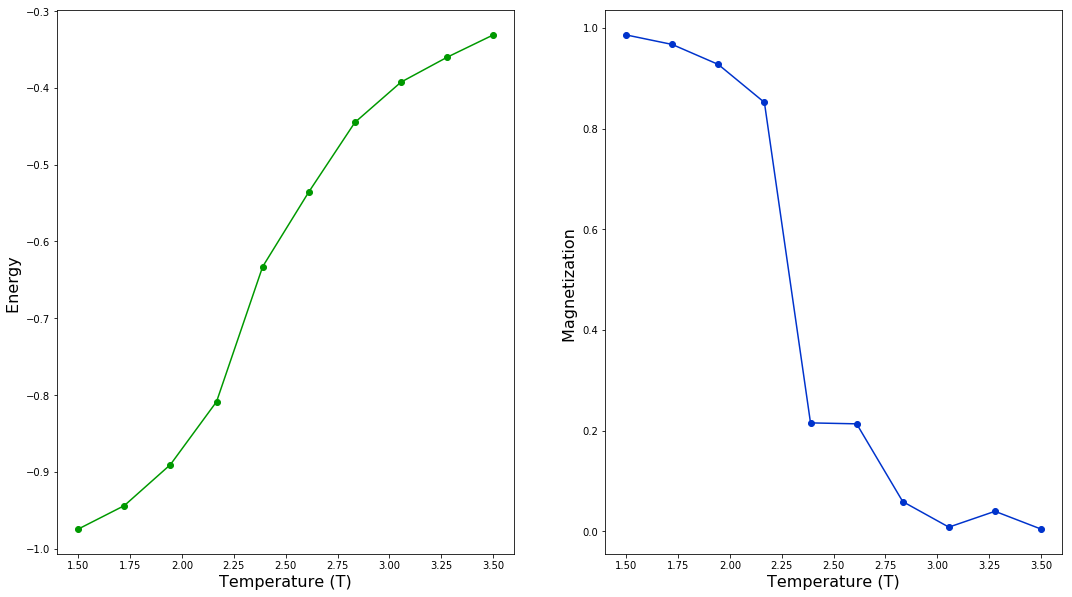

In [70]:
plot_results(E,M,temperatures)